In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import struct
from ctapipe.io.lsteventsource import LSTEventSource
from ctapipe.io import EventSeeker
from ctapipe.calib.camera import DRS4Pedestal, remove_pedestal_from_file

In [2]:
path_to_data = os.path.join("/home", "pawel1", "Pulpit", "Astrophysics", "CTA", "dragon",
                            "data", "dane_lst", "20180705", "Date20180705.0000.fits.fz")
reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)
ev = seeker[0]
number_modules = ev.lst.tel[0].svc.num_modules

In [3]:
Ped_drs4 = DRS4Pedestal("/home/pawel1/Pulpit/Astrophysics/CTA/ctapipe/examples/pedestal_value.dat", 262)
Ped_drs4.read_binary_file()
print("shape: ", Ped_drs4.pedestal_value.shape)

shape:  (262, 2, 7, 4096)


In [4]:
reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)
ev = seeker[5500]

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


In [5]:
wav_after_remove_pedestal_module0 = remove_pedestal_from_file(ev, Ped_drs4) # remove pedestal for all modules 

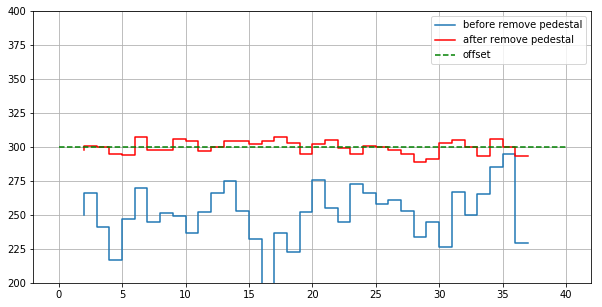

In [10]:
plt.rcParams['figure.figsize'] = 10, 5
nr = 50 #number of module 
pixel = 6
time = np.linspace(2, 37, 36)   
plt.step(time, ev.r0.tel[0].waveform[0, nr * 7:(nr + 1) * 7, 2:38][pixel], label="before remove pedestal")
plt.step(time, wav_after_remove_pedestal_module0[0, nr * 7:(nr + 1) * 7, 2:38][pixel], 'r-', label="after remove pedestal")
plt.plot([0, 40], [300, 300], 'g--', label="offset")
plt.ylim([200, 400])
plt.legend()
plt.grid(True)
plt.show()